In [14]:
# import liberaries

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


# Load the Diamonds dataset from Seaborn
diamonds_data = sns.load_dataset("diamonds")
diamonds_data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
## STATISTICS challenge:

# bonus 1:
# is there a correlation between the price and the carat? If so, what kind of correlation is it?
# what about covariance?


# bonus 2 if you have a lot of time:
# make a function on your own that calculates the standard deviation of a list of numbers (you can find the formula in last weeks slides)

In [3]:
# calculate the mean of the price by cut
price_mean_by_cut = diamonds_data.groupby('cut')['price'].mean().reset_index()
print(price_mean_by_cut)


         cut        price
0      Ideal  3457.541970
1    Premium  4584.257704
2  Very Good  3981.759891
3       Good  3928.864452
4       Fair  4358.757764


C:\Users\emana\AppData\Local\Temp\ipykernel_15368\3989936904.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_mean_by_cut = diamonds_data.groupby('cut')['price'].mean().reset_index()


In [25]:
# calculate the standard deviation of the price by cut
price_stdv_by_cut = diamonds_data.groupby('cut')['price'].std().reset_index()

print(price_stdv_by_cut)

         cut        price
0      Ideal  3808.401172
1    Premium  4349.204961
2  Very Good  3935.862161
3       Good  3681.589584
4       Fair  3560.386612


C:\Users\emana\AppData\Local\Temp\ipykernel_15368\4024275293.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_stdv_by_cut = diamonds_data.groupby('cut')['price'].std().reset_index()


In [31]:
# calculate the median of the price by cut
price_median_by_cut = diamonds_data.groupby('cut')['price'].median().reset_index()
print(price_median_by_cut)

         cut   price
0      Ideal  1810.0
1    Premium  3185.0
2  Very Good  2648.0
3       Good  3050.5
4       Fair  3282.0


C:\Users\emana\AppData\Local\Temp\ipykernel_15368\2666823748.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_median_by_cut = diamonds_data.groupby('cut')['price'].median().reset_index()


In [33]:
## calculate the mode of the price by cut
#calculate the mode of the price
price_mode= diamonds_data ['price'].mode()
print(price_mode)

#
price_mode_by_cut = diamonds_data.groupby('cut')['price'].apply(lambda x: price_mode if x.mode().empty else x.mode()).reset_index()
print(price_mode_by_cut)


0    605
Name: price, dtype: int64
         cut  level_1  price
0      Ideal        0    828
1    Premium        0    802
2  Very Good        0    552
3       Good        0    544
4       Fair        0   2167
5       Fair        1   2376
6       Fair        2   2964
7       Fair        3   3205
8       Fair        4   4368
9       Fair        5   4704


C:\Users\emana\AppData\Local\Temp\ipykernel_15368\2164985178.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_mode_by_cut = diamonds_data.groupby('cut')['price'].apply(lambda x: price_mode if x.mode().empty else x.mode()).reset_index()


In [30]:
# calculate the variance of the price by cut
price_var_by_cut= diamonds_data.groupby('cut')['price'].var().reset_index()
print(price_var_by_cut)


         cut         price
0      Ideal  1.450392e+07
1    Premium  1.891558e+07
2  Very Good  1.549101e+07
3       Good  1.355410e+07
4       Fair  1.267635e+07


C:\Users\emana\AppData\Local\Temp\ipykernel_15368\2914786589.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_var_by_cut= diamonds_data.groupby('cut')['price'].var().reset_index()


In [29]:
# Calculate 25th and 75th percentiles of price by cut
percentiles = diamonds_data.groupby('cut')['price'].quantile([0.25, 0.75]).reset_index()

# Rename columns 
percentiles.columns = ['cut', 'Q1_price', 'Q3_price']

print(percentiles)


         cut  Q1_price  Q3_price
0      Ideal      0.25    878.00
1      Ideal      0.75   4678.50
2    Premium      0.25   1046.00
3    Premium      0.75   6296.00
4  Very Good      0.25    912.00
5  Very Good      0.75   5372.75
6       Good      0.25   1145.00
7       Good      0.75   5028.00
8       Fair      0.25   2050.25
9       Fair      0.75   5205.50


C:\Users\emana\AppData\Local\Temp\ipykernel_15368\1424526011.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentiles = diamonds_data.groupby('cut')['price'].quantile([0.25, 0.75]).reset_index()


In [38]:
# Calculate price range by cut

price_range_by_cut = (diamonds_data
. groupby ('cut')['price']
.agg(lambda x: x.max() - x.min())
.reset_index(name= 'price_range')) # Rename columns
price_range_by_cut

C:\Users\emana\AppData\Local\Temp\ipykernel_15368\3228045438.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  . groupby ('cut')['price']


,cut,price_range
0,Ideal,18480
1,Premium,18497
2,Very Good,18482
3,Good,18461
4,Fair,18237


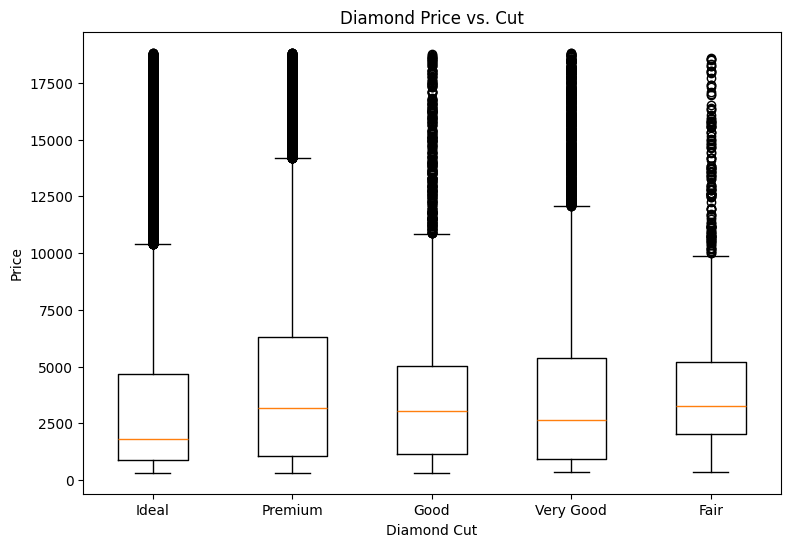

In [43]:
# 1. Boxplot of Diamond Price Vs Cut
# Group prices by cut 
price_vs_cut = [diamonds_data[diamonds_data['cut'] == cut]['price'].values for cut in diamonds_data['cut'].unique()]
#Layout
plt.figure(figsize=(9, 6))
plt.boxplot(price_vs_cut, labels=diamonds_data['cut'].unique())
plt.title('Diamond Price vs. Cut')
plt.xlabel('Diamond Cut')
plt.ylabel('Price')
plt.show()


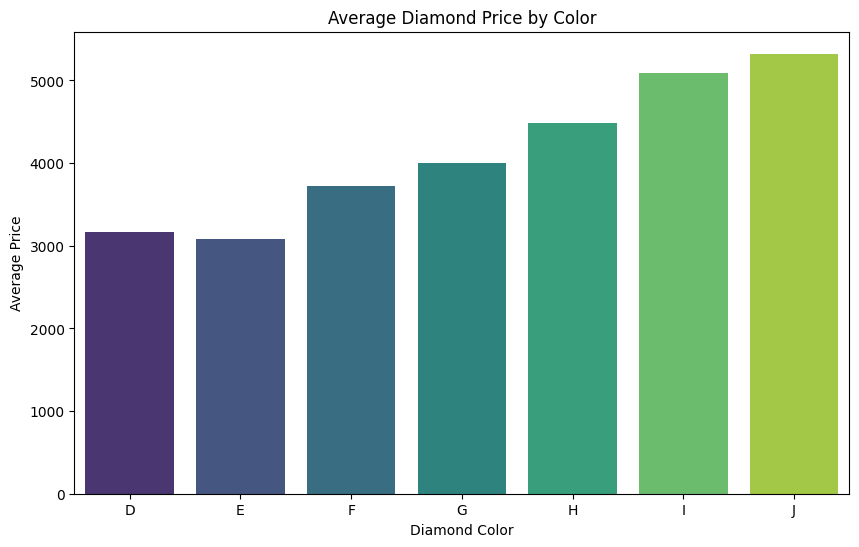

In [56]:
# 2. Barplot: Average Diamond Price by Color

# average price by color
avg_price_by_color = diamonds_data.groupby('color', observed=False)['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='color', y='price', data=avg_price_by_color, palette='viridis', hue='color', legend=False)
#layout
plt.title('Average Diamond Price by Color')
plt.xlabel('Diamond Color')
plt.ylabel('Average Price')
plt.show()

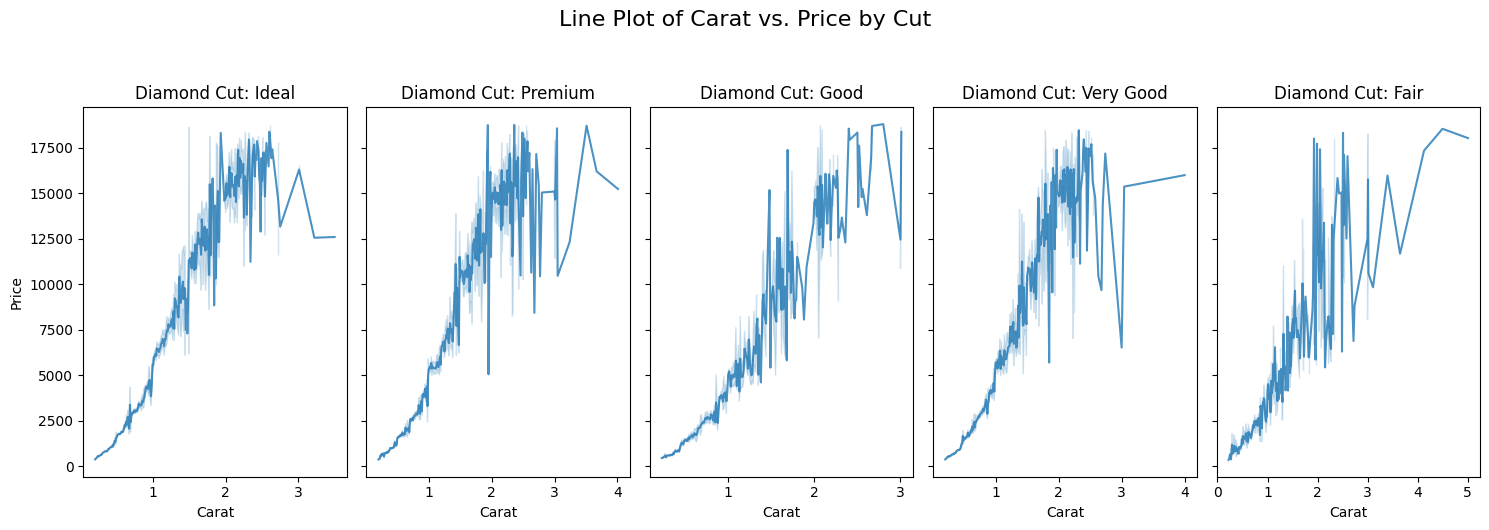

In [66]:
# 3. Scatterplot with Facets: Scatterplot of Carat vs. Price by Cut

# unique cut categories
cut_categories = diamonds_data['cut'].unique()

# separate line plots for each diamond cut category
fig, axes = plt.subplots(nrows=1, ncols=len(cut_categories), figsize=(15, 5), sharey=True)

for i, cut in enumerate(cut_categories):
    data_subset = diamonds_data[diamonds_data['cut'] == cut]
    sns.lineplot(x='carat', y='price', data=data_subset, ax=axes[i], alpha=0.8)
    axes[i].set_title(f'Diamond Cut: {cut}')
    axes[i].set_xlabel('Carat')
    if i == 0:
        axes[i].set_ylabel('Price')
# Layout
plt.suptitle('Line Plot of Carat vs. Price by Cut', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()


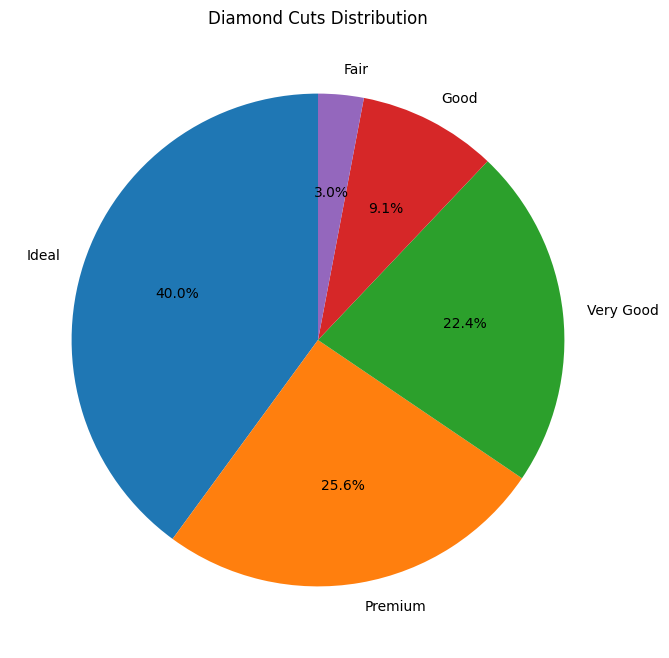

In [72]:

# 4. Pie Chart: Distribution of Diamond Cut

# occurrences of each diamond cut category
cut_counts = diamonds_data['cut'].value_counts()

# Create a pie chart to display the distribution of diamond cuts
plt.figure(figsize=(8, 8))
plt.pie(cut_counts, labels=cut_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.title('Diamond Cuts Distribution')
plt.show()


In [1]:
# Create a correlation matrix
correlation_matrix = diamonds_data.corr()

# Create a correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Diamond Attributes')
plt.show()

NameError: name 'diamonds_data' is not defined